In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,make_scorer,classification_report,f1_score


In [116]:
df=pd.read_csv('creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
228602,145580.0,-0.613633,0.810861,0.927646,-1.326440,1.181555,-0.604655,1.366525,-0.286191,-0.075560,...,0.149530,0.476010,-0.688767,0.461790,1.114409,-0.109974,-0.191301,-0.184685,0.99,0
191990,129487.0,-0.371210,1.422469,-0.320734,2.795396,1.118451,0.210689,0.988599,0.469395,-2.187173,...,0.165482,0.160833,0.037274,0.718432,0.014066,-0.107274,-0.170964,-0.086858,49.56,0
262136,160332.0,-1.208246,-0.234469,2.343101,-0.976442,-1.620568,0.317243,-0.883054,0.824024,-0.781072,...,0.036912,0.272989,-0.100609,0.018973,0.238126,-0.086098,-0.018383,-0.012273,85.80,0
33453,37238.0,1.110548,0.222418,0.087191,1.091806,-0.037800,-0.628325,0.376837,-0.107644,-0.093180,...,-0.340189,-1.121648,0.139734,0.002385,0.288018,-0.714628,0.005935,0.027582,53.87,0
40790,40399.0,-1.743996,-0.434002,1.407100,-2.272039,-2.474862,0.703567,1.925945,-0.252873,1.615836,...,-0.024975,0.721850,0.044265,0.148665,0.478043,0.066773,0.068302,-0.092739,436.00,0


In [117]:
X = df.drop(columns=['Time','Amount','Class'])
y = df['Class']

In [118]:
lr=LogisticRegression(class_weight={0:1,1:2})

In [119]:
lr.fit(X,y)

LogisticRegression(class_weight={0: 1, 1: 2})

In [120]:
predicted_y=lr.predict(X)

In [121]:
df_predicted=pd.DataFrame(predicted_y)

In [122]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler:', StandardScaler()), ('algo:', KNeighborsRegressor())],
 'verbose': False,
 'scaler:': StandardScaler(),
 'algo:': KNeighborsRegressor(),
 'scaler:__copy': True,
 'scaler:__with_mean': True,
 'scaler:__with_std': True,
 'algo:__algorithm': 'auto',
 'algo:__leaf_size': 30,
 'algo:__metric': 'minkowski',
 'algo:__metric_params': None,
 'algo:__n_jobs': None,
 'algo:__n_neighbors': 5,
 'algo:__p': 2,
 'algo:__weights': 'uniform'}

In [123]:
X=df.drop(columns=['Class','Time','Amount'])

In [124]:
predicted_y=lr.predict(X)

In [125]:
df_predicted = pd.DataFrame(predicted_y)

In [126]:
df_predicted.value_counts()

0    284370
1       437
dtype: int64

In [127]:
lr.get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 2},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [128]:
grid=GridSearchCV(
	estimator=LogisticRegression(),
	param_grid={"class_weight":[{0:1,1:number} for number in range(1,10)]},
	cv=5,
 	scoring={"precision":make_scorer(precision_score),"recall":make_scorer(recall_score)},
	refit='precision'
	)

In [129]:
grid.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}]},
             refit='precision',
             scoring={'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [130]:
predicted_y=grid.predict(X)

In [131]:
df_results = pd.DataFrame(grid.cv_results_)

In [132]:
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,3.397988,0.378465,0.052460,0.009946,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.694444,0.968750,0.913043,0.881579,...,0.092222,1,0.757576,0.626263,0.428571,0.683673,0.500000,0.599217,0.119921,9
1,3.182850,0.420594,0.044081,0.004782,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.700000,0.971429,0.818182,0.815217,...,0.086752,2,0.777778,0.686869,0.551020,0.765306,0.632653,0.682725,0.084528,8
2,3.242769,0.144461,0.053058,0.015622,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.695652,0.960526,0.729412,0.828283,...,0.092564,3,0.808081,0.737374,0.632653,0.836735,0.683673,0.739703,0.075756,7
3,3.347097,0.654827,0.047806,0.009109,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.677966,0.962025,0.717391,0.830000,...,0.100011,4,0.808081,0.767677,0.673469,0.846939,0.724490,0.764131,0.060979,6
4,2.745143,0.361888,0.047354,0.008130,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.666667,0.950000,0.718750,0.830000,...,0.099020,5,0.808081,0.767677,0.704082,0.846939,0.724490,0.770254,0.052519,5
5,3.176565,0.268081,0.055870,0.009944,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.666667,0.951807,0.704082,0.823529,...,0.101738,6,0.808081,0.797980,0.704082,0.857143,0.724490,0.778355,0.056381,4
6,2.667175,0.293225,0.046675,0.011396,"{0: 1, 1: 7}","{'class_weight': {0: 1, 1: 7}}",0.666667,0.952381,0.676471,0.833333,...,0.105961,7,0.808081,0.808081,0.704082,0.867347,0.724490,0.782416,0.060037,3
7,2.793724,0.403036,0.059214,0.017594,"{0: 1, 1: 8}","{'class_weight': {0: 1, 1: 8}}",0.658333,0.954023,0.650943,0.817308,...,0.112134,8,0.797980,0.838384,0.704082,0.867347,0.734694,0.788497,0.061346,2
8,3.095182,0.266696,0.062056,0.013163,"{0: 1, 1: 9}","{'class_weight': {0: 1, 1: 9}}",0.647541,0.954023,0.610619,0.787037,...,0.121058,9,0.797980,0.838384,0.704082,0.867347,0.755102,0.792579,0.058230,1


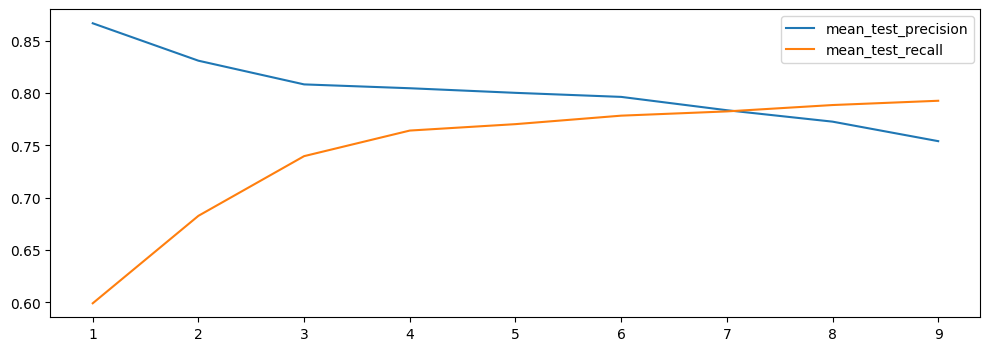

In [149]:
plt.figure(figsize=(12,4))
for i in ['mean_test_precision','mean_test_recall']:
    plt.plot([j[1] for j in df_results['param_class_weight']],
    df_results[i],
    label=i)
plt.legend()

In [141]:
for k in df_results['param_class_weight']:
    print (k,"  ",k[1])

{0: 1, 1: 1}    1
{0: 1, 1: 2}    2
{0: 1, 1: 3}    3
{0: 1, 1: 4}    4
{0: 1, 1: 5}    5
{0: 1, 1: 6}    6
{0: 1, 1: 7}    7
{0: 1, 1: 8}    8
{0: 1, 1: 9}    9
